### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [51]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [52]:
#find out unique value of each column and its counts
for col in data.columns:
    print(col)
    print(data[col].value_counts())

#Find number of null values in each column
data.isna().sum()

#identify if there are any duplicated records
data.duplicated().sum()



destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int

74

3. Decide what to do about your missing data -- drop, replace, other...

*   List item
*   List item



In [53]:
# remove duplicate records
data.drop_duplicates(inplace=True)

#convert age column to numeric for which assigned some default value for 50plus and below21
data['age'] = data['age'].replace({'50plus': '55','below21': '10'})
data['age'] = data['age'].str.strip()
data['age'] = pd.to_numeric(data['age'], errors='coerce').astype('int64')

#separate income column that has range into minIncome and maxIncome and convert to numeric type
data[['minIncome', 'maxIncome']] = data['income'].str.split(' - ', expand=True)
data['minIncome'] = data['minIncome'].str.replace('$', '')
data['maxIncome'] = data['maxIncome'].str.replace('$', '')


data['minIncome'] = data['minIncome'].replace({'100000 or More': '100000','Less than 12500': '0'})
data['minIncome'] = pd.to_numeric(data['minIncome'], errors='coerce').astype('int64')

data.loc[data['income'] == '$100000 or More', 'maxIncome'] = '200000'
data.loc[data['income'] == 'Less than $12500', 'maxIncome'] = '12500'
data['maxIncome'] = pd.to_numeric(data['maxIncome'], errors='coerce').astype('int64')

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  int64 
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

4. What proportion of the total observations chose to accept the coupon?



Proportion of the total observations chose to accept the coupon 0.5675654242664552


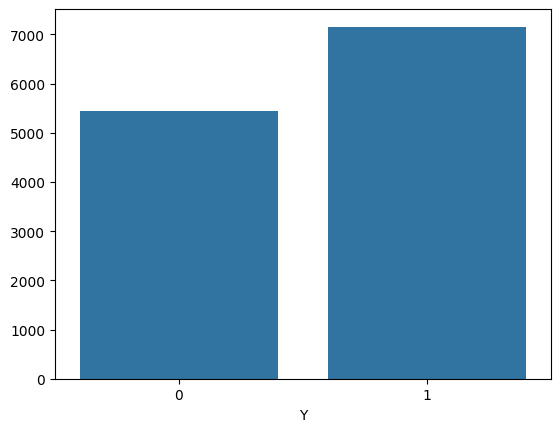

In [35]:
total_observations=data.shape[0]
coupons_accepted_count=data[data['Y']==1].shape[0]
coupons_accepted_proportion=coupons_accepted_count/total_observations
print("Proportion of the total observations chose to accept the coupon",coupons_accepted_proportion)
counts = data['Y'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.show()
#This indicates that 56% of observations have accepted the coupons

5. Use a bar plot to visualize the `coupon` column.

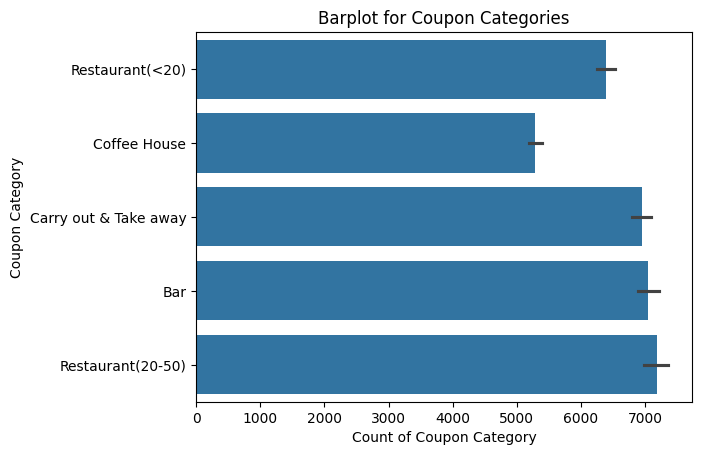

In [36]:
# display count for each coupon categories using bar plot
sns.barplot(data['coupon'])
plt.title('Barplot for Coupon Categories')
plt.ylabel('Coupon Category')
plt.xlabel('Count of Coupon Category')
plt.show()


6. Use a histogram to visualize the temperature column.

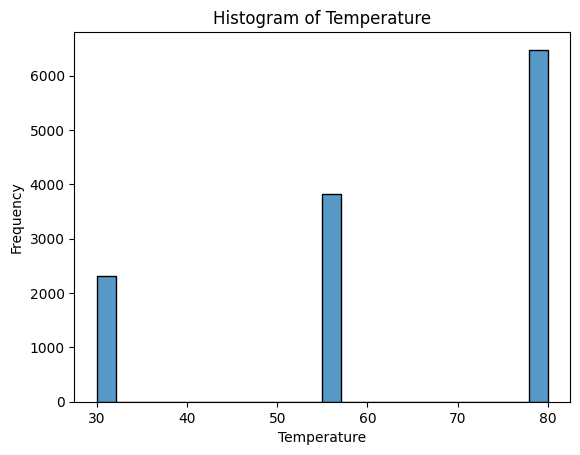

In [37]:
# display frequency  for each temperature  using histogram plot

sns.histplot(data['temperature'])
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
data_bar=data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [39]:
count_barcoupon_accepted=data_bar[data_bar['Y']==1].shape[0]
total_bar_coupons=data_bar.shape[0]
proportion_barcoupon_accepted=count_barcoupon_accepted/total_bar_coupons
print("Proportion of bar coupons that were accepted",proportion_barcoupon_accepted)

# This indicates that 40% of bar coupons got accepted as per the data


Proportion of bar coupons that were accepted 0.4099502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
fewer_times=['never','less1','1~3']
more_times=['4~8','gt8']
drivers_bar_fewertimes=data_bar[(data_bar['Bar'].isin(fewer_times)) & (data_bar['Y']==1)]
drivers_bar_moretimes=data_bar[data_bar['Bar'].isin(more_times) & data_bar['Y']==1]
acceptance_rate_lessthan3times_more=drivers_bar_fewertimes.shape[0]/drivers_bar_moretimes.shape[0]

print("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.",acceptance_rate_lessthan3times_more)
# This indicates that drivers who went to bar less times accepted the coupon  4 times more than the drivers who went more.

Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more. 4.333333333333333


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
more_than_once_times=['4~8','gt8','1~3']
drivers_age25_morethanoncebar=data_bar[(data_bar['Bar'].isin(more_than_once_times)) & (data_bar['age']>25) & (data_bar['Y']==1)]
other_drivers_age25_morethanoncebar=data_bar[~((data_bar['Bar'].isin(more_than_once_times)) & (data_bar['age']>25))  & (data_bar['Y']==1)]
acceptance_rate_driversage25bar_others=drivers_age25_morethanoncebar.shape[0]/other_drivers_age25_morethanoncebar.shape[0]

print('acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others',acceptance_rate_driversage25bar_others)
# This indicates 54% of drivers who went to bar more than once and over 25 age has accepted coupon vs the other drivers who accepted the coupon.



acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others 0.5488721804511278


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [41]:
more_than_once_times=['4~8','gt8','1~3']
other_occupations=['farming','fishing','forestry']

drivers_no_kid_occupations_morethanoncebar=data_bar[(data_bar['Bar'].isin(more_than_once_times)) & ~(data_bar['occupation'].isin(other_occupations)) & ~(data_bar['passanger']=='Kid(s)') & (data_bar['Y']==1)]
other_drivers_no_kid_occupations_morethanoncebar=data_bar[~((data_bar['Bar'].isin(more_than_once_times)) & ~(data_bar['occupation'].isin(other_occupations)) & ~(data_bar['passanger']=='Kid(s)') )& (data_bar['Y']==1)]
acceptance_rate_drivers_no_kid_occupations_morethanoncebar=drivers_no_kid_occupations_morethanoncebar.shape[0]/other_drivers_no_kid_occupations_morethanoncebar.shape[0]
print('acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is',acceptance_rate_drivers_no_kid_occupations_morethanoncebar)

# This indicates 91% of drivers who went to bar more than once a month with no kids as passengers and in occupations other than  farming, fishing, or forestry , accepted the coupons.

acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 0.9118329466357309


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [42]:
drivers_morethanonce_nokids_window=data_bar[data_bar['Bar'].isin(more_than_once_times) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['maritalStatus']=='widowed') & (data_bar['Y']==1)]
other_drivers_morethanonce_nokids_window=data_bar[~((data_bar['Bar'].isin(more_than_once_times) & ~(data_bar['passanger']=='Kid(s)') & ~(data_bar['maritalStatus']=='widowed'))) & (data_bar['Y']==1)]
acceptance_rate_drivers_no_kid_occupations_morethanoncebar=drivers_morethanonce_nokids_window.shape[0]/other_drivers_morethanonce_nokids_window.shape[0]


drivers_morethanonce_ageunder30=data_bar[data_bar['Bar'].isin(more_than_once_times) & (data_bar['age']<30) & (data_bar['Y']==1)]
other_drivers_morethanonce_ageunder30=data_bar[~(data_bar['Bar'].isin(more_than_once_times) & (data_bar['age']<30)) & (data_bar['Y']==1)]
acceptance_rate_drivers_ageunder30_morethanonce=drivers_morethanonce_ageunder30.shape[0]/other_drivers_morethanonce_ageunder30.shape[0]

drivers_restaurant=data[(data['coupon']=='Restaurant(<20)') & (data['maxIncome']<50000) & (data['Y']==1)]
other_drivers_restaurant=data[~((data['coupon']=='Restaurant(<20)') & (data['maxIncome']<50000) ) & (data['Y']==1)]
acceptance_rate_drivers_restaurant=drivers_restaurant.shape[0]/other_drivers_restaurant.shape[0]

print("acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed",acceptance_rate_drivers_ageunder30_morethanonce)
print("acceptance rates between those drivers who go to bars more than once a month and are under the age of 30",acceptance_rate_drivers_no_kid_occupations_morethanoncebar)
print('acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K',acceptance_rate_drivers_restaurant)

#This indicates that 91% of drivers who went to bars and aged<30 accepted coupon  vs others
# This indicates that only 17% of drivers, who had income less thatn 50K and visited cheap restaurants , accepted the coupons
# This indicates that 43% of drivers, who went to bars more than once and no kids and no widow passengers ,accepted the coupons

acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 0.4330434782608696
acceptance rates between those drivers who go to bars more than once a month and are under the age of 30 0.9118329466357309
acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K 0.1715501718775577


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [173]:
# This indicates 91% of drivers who went to bar more than once a month with no kids as passengers and in occupations other than  farming, fishing, or forestry , accepted the coupons.
# This indicates 54% of drivers who went to bar more than once and over 25 age has accepted coupon vs the other drivers who accepted the coupon.
# This indicates that 40% of bar coupons got accepted as per the data
#This indicates that 91% of drivers who went to bars and aged<30 accepted coupon  vs others
# This indicates that only 17% of drivers, who had income less thatn 50K and visited cheap restaurants , accepted the coupons
# This indicates that 43% of drivers, who went to bars more than once and no kids and no widow passengers ,accepted the coupons
# This indicates that drivers who went to bar less times accepted the coupon  4 times more than the drivers who went more.

# Based on these we can confidently say that drivers who went to bar fewer times will definitely accepts the coupon
# In the order,drivers who visited more than once a month to bar with no kid passengers will have high chance of accepting the coupon
# next in order comes drivers who visited more than once and are aged>25




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [54]:
# Create dataframe to explore coupons of Coffee house
data_coffee=data[data['coupon']=='Coffee House']
data_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,minIncome,maxIncome
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999


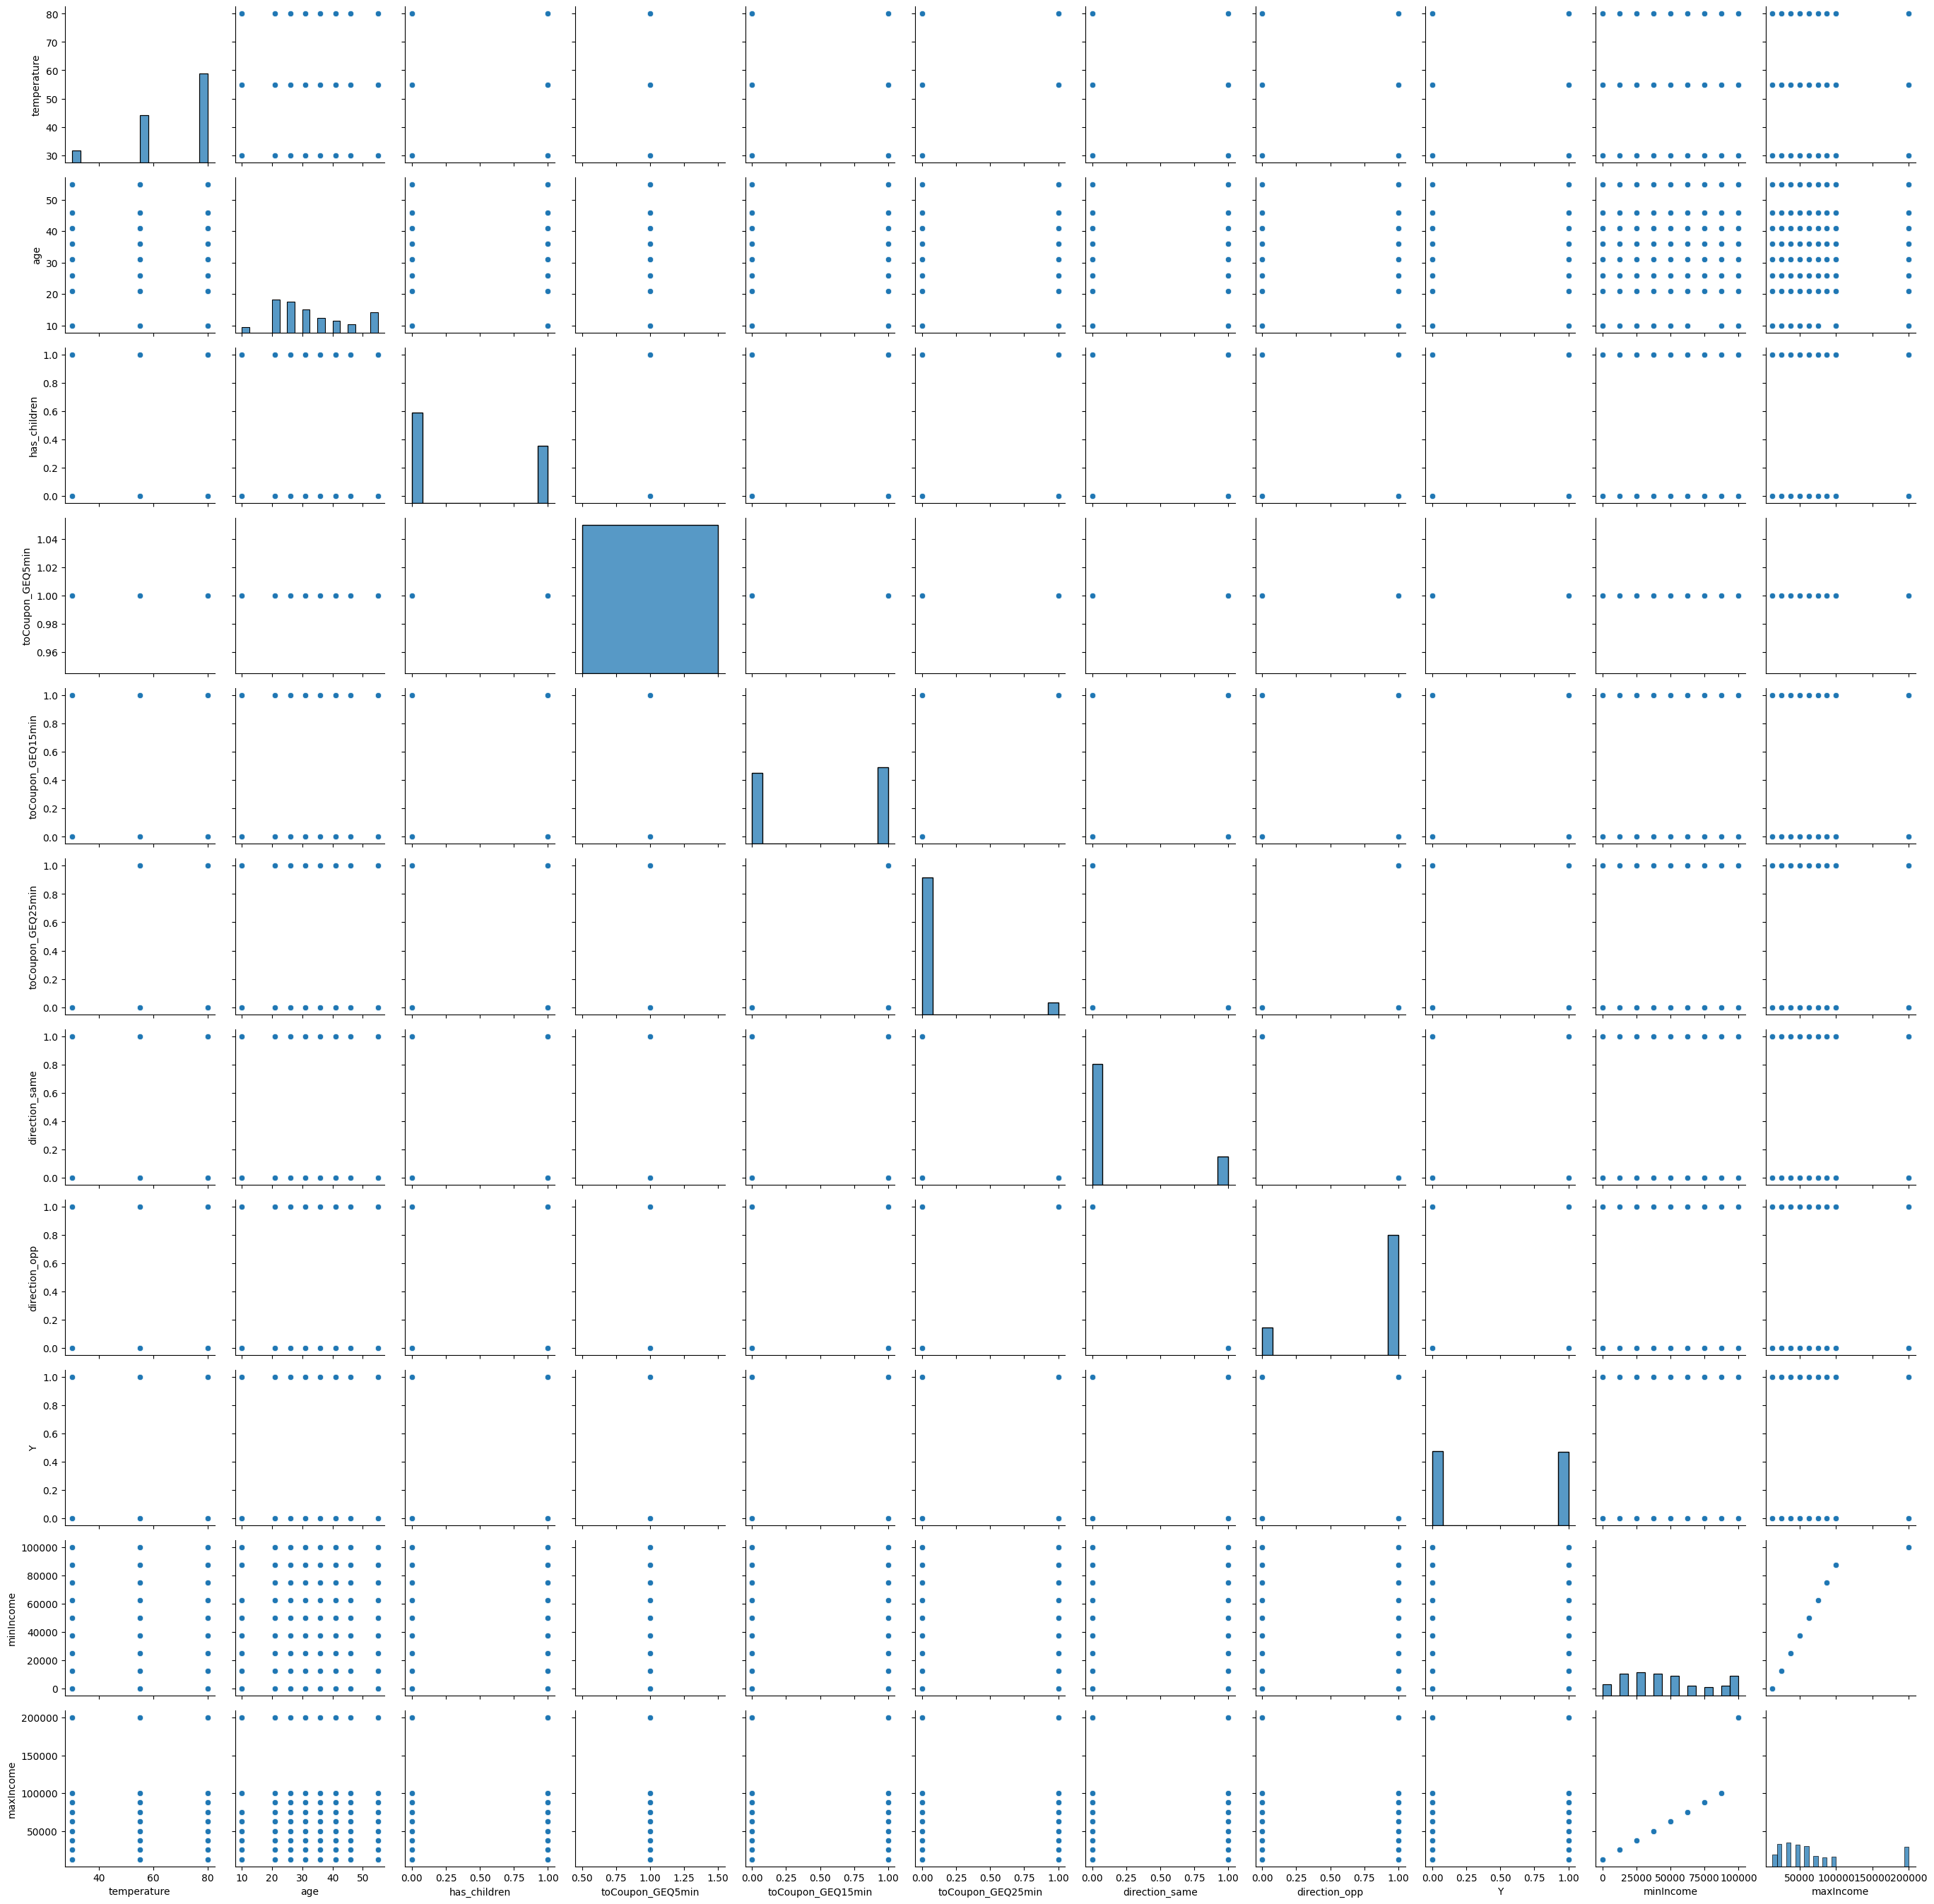

In [46]:
g = sns.PairGrid(data_coffee)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [55]:
# Proportion of coffee house coupons that got accepted
data_coffee[data_coffee['Y']==1].shape[0]/data_coffee.shape[0]
# 49 % of coffee house coupons got accepted

0.4986212083228879

In [56]:
#  Identify acceptance rate of drivers who went to Coffee house few times vs others
data_coffee_fewer=data_coffee[(data_coffee['CoffeeHouse'].isin(fewer_times)) & (data_coffee['Y']==1)]
data_coffee_fewer.shape[0]/data_coffee.shape[0]

0.3414389571321133

In [57]:
#   acceptance rate of drivers who went to Coffee house more times vs others
more_than_once_times=['4~8','gt8','1~3']

data_coffee_more=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & data_coffee['Y']==1]
data_coffee_more.shape[0]/data_coffee.shape[0]


0.31737277513161194

In [58]:
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers and no married passengers vs others
more_than_once_times=['4~8','gt8','1~3']

data_coffee_morethanonce_nokids_window=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & ~(data_coffee['passanger']=='Kid(s)') & ~(data_coffee['maritalStatus']=='widowed') & (data_coffee['Y']==1)]
other_drivers_morethanonce_nokids_window=data_coffee[~((data_coffee['CoffeeHouse'].isin(more_than_once_times) & ~(data_coffee['passanger']=='Kid(s)') & ~(data_coffee['maritalStatus']=='widowed')) & data_coffee['Y']==1)]

acceptance_rate_drivers_no_kid_occupations_morethanoncebar=data_coffee_morethanonce_nokids_window.shape[0]/other_drivers_morethanonce_nokids_window.shape[0]
acceptance_rate_drivers_no_kid_occupations_morethanoncebar


0.42821339061940566

In [66]:
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers  is 1.5 times more than others
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers and age <30 is 51% of others

more_than_once_times=['4~8','gt8','1~3']

drivers_morethanonce_nokids=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & ~(data_coffee['passanger']=='Kid(s)')  & (data_coffee['Y']==1)]
other_drivers_morethanonce_nokids=data_coffee[~((data_coffee['CoffeeHouse'].isin(more_than_once_times) & ~(data_coffee['passanger']=='Kid(s)') )) & (data_coffee['Y']==1)]
acceptance_rate_drivers_nokids_morethanonceCoffeehouse=drivers_morethanonce_nokids.shape[0]/other_drivers_morethanonce_nokids.shape[0]


drivers_morethanonce_ageunder30=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['age']<30) & (data_coffee['Y']==1)]
other_drivers_morethanonce_ageunder30=data_coffee[~(data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['age']<30)) & (data_coffee['Y']==1)]
acceptance_rate_drivers_ageunder30_morethanonce=drivers_morethanonce_ageunder30.shape[0]/other_drivers_morethanonce_ageunder30.shape[0]

print('acceptance rate of drivers who went to Coffee house more than once with no kid passengers vs others',acceptance_rate_drivers_nokids_morethanonceCoffeehouse)
print('acceptance rate of drivers who went to Coffee house more than once with no kid passengers and age <30 is ',acceptance_rate_drivers_ageunder30_morethanonce)

acceptance rate of drivers who went to Coffee house more than once with no kid passengers vs others 1.5081967213114753
acceptance rate of drivers who went to Coffee house more than once with no kid passengers and age <30 is  0.518320610687023


In [63]:
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers and no married passengers is 1.5 times more than others

more_than_once_times=['4~8','gt8','1~3']
other_occupations=['farming','fishing','forestry']

drivers_no_kid_occupations_morethanonceCoffee=data_coffee[(data_coffee['CoffeeHouse'].isin(more_than_once_times)) & ~(data_coffee['occupation'].isin(other_occupations)) & ~(data_coffee['passanger']=='Kid(s)') & (data_coffee['Y']==1)]
other_drivers_no_kid_occupations_morethanonceCoffee=data_coffee[~((data_coffee['CoffeeHouse'].isin(more_than_once_times)) & ~(data_coffee['occupation'].isin(other_occupations)) & ~(data_coffee['passanger']=='Kid(s)') )& (data_coffee['Y']==1)]
acceptance_rate_drivers_no_kid_occupations_morethanonceCoffee=drivers_no_kid_occupations_morethanonceCoffee.shape[0]/other_drivers_no_kid_occupations_morethanonceCoffee.shape[0]
acceptance_rate_drivers_no_kid_occupations_morethanonceCoffee

1.5081967213114753

In [62]:
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers and on Sunny data is 1.13 times more than others

drivers_morethanonce_nokids=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['weather']=='Sunny') & ~(data_coffee['passanger']=='Kid(s)') & (data_coffee['Y']==1)]
other_drivers_morethanonce_nokids=data_coffee[~((data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['weather']=='Sunny') & ~(data_coffee['passanger']=='Kid(s)') )) & (data_coffee['Y']==1)]
acceptance_rate_drivers_nokids_morethanoncebar=drivers_morethanonce_nokids.shape[0]/other_drivers_morethanonce_nokids.shape[0]
print(acceptance_rate_drivers_nokids_morethanoncebar)

1.1364124597207304


In [61]:
#   acceptance rate of drivers who went to Coffee house more than once with no kid passengers and on Rainy data is 3% of other drivers

drivers_morethanonce_nokids=data_coffee[data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['weather']=='Rainy') & ~(data_coffee['passanger']=='Kid(s)') & (data_coffee['Y']==1)]
other_drivers_morethanonce_nokids=data_coffee[~((data_coffee['CoffeeHouse'].isin(more_than_once_times) & (data_coffee['weather']=='Rainy') & ~(data_coffee['passanger']=='Kid(s)') )) & (data_coffee['Y']==1)]
acceptance_rate_drivers_nokids_morethanoncebar=drivers_morethanonce_nokids.shape[0]/other_drivers_morethanonce_nokids.shape[0]
print(acceptance_rate_drivers_nokids_morethanoncebar)

0.030569948186528497
